# Plot 1

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

## Reading in files

In [5]:
turnstiles1 = pd.read_csv('turnstile_160507.txt')
turnstiles2 = pd.read_csv('turnstile_160514.txt')
turnstiles3 = pd.read_csv('turnstile_160521.txt')
turnstiles4 = pd.read_csv('turnstile_160528.txt')

## Concat 4 Weeks of Data and Check Resulting DataFrame

In [6]:
# concatenating 4 weeks of data
turnstiles_total = pd.concat([turnstiles1, turnstiles2, turnstiles3, turnstiles4], ignore_index = True)

In [7]:
turnstiles_total.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
777933,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2016,05:00:00,REGULAR,5554,246
777934,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2016,09:00:00,REGULAR,5554,246
777935,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2016,13:00:00,REGULAR,5554,246
777936,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2016,17:00:00,REGULAR,5554,246
777937,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,05/27/2016,21:00:00,REGULAR,5554,246


## Cleaning and Aggregating Data

In [8]:
# stripping trailing whitespaces
turnstiles_total.columns = turnstiles_total.columns.str.strip()

In [9]:
# setting the initial keys for aggregation
ts_group = turnstiles_total.groupby(['STATION','C/A','UNIT','SCP'])

In [10]:
# calculalting cum_entries as the max entries - min entries by turnstile
cum_entries = pd.DataFrame(ts_group['ENTRIES'].max() - ts_group['ENTRIES'].min())

In [11]:
# calculating cum_exits as the max exits - min exits by turnstile
cum_exits = pd.DataFrame(ts_group['EXITS'].max() - ts_group['EXITS'].min())

In [12]:
# joining cum_entries and cum_exits into one dataframe
total = cum_entries.join(cum_exits)

In [13]:
# calculating total entries and exits
total['TOTAL'] = total['ENTRIES'] + total['EXITS']

In [14]:
# restting the index
total_reset = total.reset_index()

In [15]:
# sorting by total and looking at the first 60 values. It looks like there are some weird (extreme) values for certain turnstiles
sort = total_reset.sort_values(by = 'TOTAL', ascending = False)
sort.head(n=60)

,STATION,C/A,UNIT,SCP,ENTRIES,EXITS,TOTAL
1073,47-50 STS ROCK,N501,R020,01-03-02,1906842686,2023024267,3929866953
2244,CANAL ST,A066,R118,00-00-00,1718047907,1754765563,3472813470
666,28 ST,R228,R143,00-00-01,1424934302,1876080834,3301015136
823,34 ST-PENN STA,N067,R012,00-03-00,1961790095,486935778,2448725873
2246,CANAL ST,A066,R118,00-00-02,317601781,2022142248,2339744029
3091,GRD CNTRL-42 ST,R238A,R046,02-00-03,1609813745,542505,1610356250
2095,BOWLING GREEN,R200A,R041,01-05-00,1289811858,153223168,1443035026
2043,BEVERLY RD,R641,R210,00-06-00,300793530,1036122109,1336915639
489,181 ST,R183,R260,00-00-02,150406189,300914556,451320745
936,36 ST,N312,R339,00-06-00,302009169,134874272,436883441


In [16]:
# based on quick and dirty look at data, cut off individual turnstiles with a max of 400,000
# other ideas - can cut based on % of total, ratio of entry/exit
sort_cut = sort[sort['TOTAL']<400000]

In [17]:
# group by station, sum entries, exits and totals, and then reset index
by_station = sort_cut.groupby('STATION').sum().reset_index()

In [18]:
# sort by total and take first 8 (arbitrary - for plotting purposes) values
by_station = by_station.sort_values(by = 'TOTAL', ascending = False).head(8) 

In [19]:
# finally!!
by_station

,STATION,ENTRIES,EXITS,TOTAL
61,34 ST-PENN STA,4046171,3458719,7504890
229,GRD CNTRL-42 ST,3639277,3214217,6853494
59,34 ST-HERALD SQ,2950994,2715805,5666799
46,23 ST,3050579,2301885,5352464
14,14 ST-UNION SQ,2759008,2377425,5136433
109,86 ST,2744140,2153643,4897783
346,TIMES SQ-42 ST,2463400,2220023,4683423
68,42 ST-PORT AUTH,2657407,1865145,4522552


## Plotting results

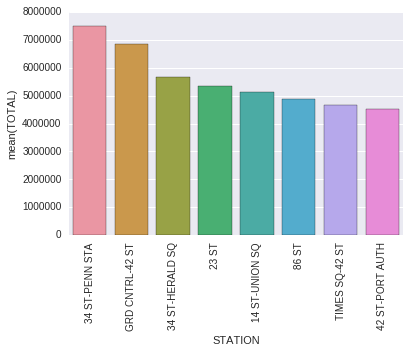

In [20]:
# initial plot
sns.barplot(x = 'STATION', y = 'TOTAL', data = by_station)
plt.xticks(rotation=90);